In [48]:
import github_command as gitcmd

In [49]:
gitcmd.push(file_to_transfer='TD3_PlayingWithPandas.ipynb',
            message = 'TD3 init',
            repos = 'TDs_ESILV')

In [3]:
#files_to_push = ['TD3_PlayingWithPandas.ipynb', 'data', 'chromedriver']
#commits       = ['Jupyter Notebook', 'Where scrapped images are', 'Chromedriver is used here by Selenium']
#gitcmd.push_multiple_files(files_to_push, commits, 'TDs_ESILV.git')

## 0) Téléchargement de la base

In [4]:
url = "https://www.data.gouv.fr/fr/datasets/r/6aad6dbd-5da0-4815-8e68-39e950cec49e"

In [5]:
import requests as req

In [15]:
reponse = req.get(url)

In [17]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9688 sha256=67d729e1c2be0e6336728a51c60c5fe9ca4b09de454cc390b2ae9758a05c71e4
  Stored in directory: /Users/lucbertin/Library/Caches/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [18]:
import wget

In [21]:
wget.download(url, out="accidents.zip")

'accidents.zip'

In [22]:
!unzip accidents.zip

Archive:  accidents.zip
  inflating: accidents_insee.csv     


In [28]:
!head -n 2 accidents_insee.csv

"org";"lum";"agg";"int";"atm";"col";"com";"dep";"catr";"infra";"voie";"v1";"v2";"circ";"nbv";"pr";"pr1";"vosp";"prof";"plan";"situ";"ttue";"tbg";"tbl";"tindm";"typenumero";"numero";"distancemetre";"libellevoie";"coderivoli";"grav";"gps";"lat";"long";"adr";"numac";"codeinsee";"geoflamatch";"nbimplique"
1;1;1;1;1;3;"305";"973";;;"";"";"";;;"";"";;;;;0;1;0;1;;"";"";"";"";10.8;"G";"0000000";"0000000";"";"382566";"97305";"N";2


## 1) Ouverture du CSV 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("accidents_insee.csv", sep=';')

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,29,31,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mieux: bien regarder l'encoding du dataset vis à vis de l'encoding de python (utf-8)

In [50]:
df.shape

(454372, 39)

In [53]:
df.head(5).T

,0,1,2,3,4
org,1,1,1,1,1
lum,1,1,1,1,1
agg,1,5,5,5,4
int,1,1,1,1,1
atm,1,1,1,1,1
col,3,3,3,3,2
com,305,311,309,304,312
dep,973,973,973,973,973
catr,NaN,NaN,NaN,NaN,NaN
infra,NaN,NaN,NaN,NaN,NaN


In [54]:
df.describe()

,org,lum,agg,int,atm,col,com,dep,catr,infra,...,tbg,tbl,tindm,typenumero,numero,distancemetre,grav,lat,numac,nbimplique
count,454372.000000,454372.000000,454372.000000,454372.000000,454349.000000,454363.000000,454372.000000,454372.000000,440695.000000,440347.000000,...,454372.000000,454372.000000,454372.000000,324314.000000,2.055230e+05,322016.000000,454372.000000,1.659330e+05,454372.000000,454372.000000
mean,3.487510,1.916828,4.966615,1.673378,1.545123,4.192520,188.051440,560.217645,3.456849,0.451814,...,0.471596,0.792461,0.910923,1.336498,3.892508e+275,0.596424,11.365038,1.163120e+75,227186.500000,2.234290
std,1.795572,1.524197,3.069634,1.485990,1.593388,1.977477,172.584147,289.326704,1.225236,1.370732,...,0.682383,0.808042,0.908218,1.987186,inf,16.542833,27.062357,4.737955e+77,131166.042593,1.183179
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.439300e+04,-159.000000,0.430000,-4.000000e+05,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,310.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.430000,0.000000e+00,113593.750000,2.000000
50%,5.000000,1.000000,6.000000,1.000000,1.000000,3.000000,119.000000,620.000000,4.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,9.000000e+00,0.000000,0.860000,4.382029e+06,227186.500000,2.000000
75%,5.000000,3.000000,8.000000,2.000000,1.000000,6.000000,279.000000,780.000000,4.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,6.100000e+01,0.000000,10.800000,4.800710e+06,340779.250000,2.000000
max,5.000000,5.000000,9.000000,9.000000,9.000000,7.000000,987.000000,974.000000,9.000000,7.000000,...,42.000000,53.000000,71.000000,9.000000,8.000000e+280,4102.000000,2859.200000,1.930000e+80,454372.000000,86.000000


###  1.1 regardons les types de chaques colonnes 

In [6]:
df.dtypes

org                int64
lum                int64
agg                int64
int                int64
atm              float64
col              float64
com                int64
dep                int64
catr             float64
infra            float64
voie             float64
v1               float64
v2                object
circ             float64
nbv              float64
pr                object
pr1              float64
vosp             float64
prof             float64
plan             float64
situ             float64
ttue               int64
tbg                int64
tbl                int64
tindm              int64
typenumero       float64
numero           float64
distancemetre    float64
libellevoie       object
coderivoli        object
grav             float64
gps               object
lat              float64
long              object
adr               object
numac              int64
codeinsee         object
geoflamatch       object
nbimplique         int64
dtype: object

### 1.2 Listons les colonnes

In [7]:
df.columns

Index(['org', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'dep', 'catr', 'infra',
       'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan',
       'situ', 'ttue', 'tbg', 'tbl', 'tindm', 'typenumero', 'numero',
       'distancemetre', 'libellevoie', 'coderivoli', 'grav', 'gps', 'lat',
       'long', 'adr', 'numac', 'codeinsee', 'geoflamatch', 'nbimplique'],
      dtype='object')

## Affichage de caractéristiques directement pas pandas

pandas donne aux dataframes la possibilité de faire des graphs, avec la méthode "plot" .
Ici [ plot(kind="box") ] pour une boîte à moustache
une configuration du notebook avec [ %matplotlib notebook ] pour un affichage dynamique


In [126]:
%matplotlib inline

## setting parameters for figure size :

In [55]:
### c'est plus gros comme ça... on override les params par défaut

In [127]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [128]:
plt.rcParams['figure.figsize'] = [12, 8]

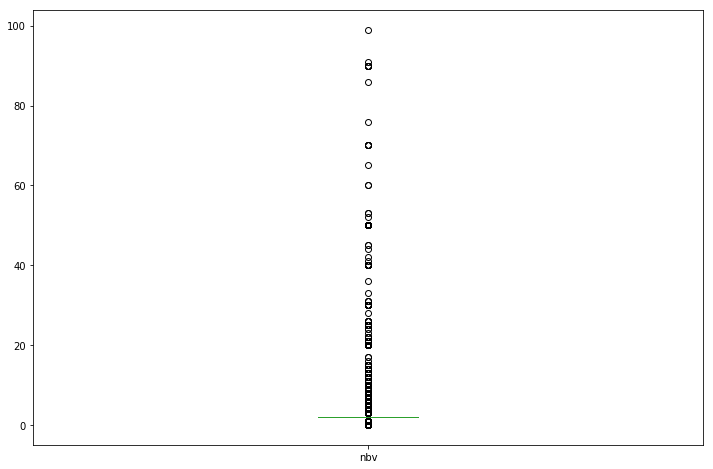

In [129]:
df.nbv.plot(kind='box')

In [64]:
df.nbv.value_counts(dropna=False)

 2.0     247614
 1.0      52738
 0.0      50784
 4.0      39931
 3.0      35676
NaN       14566
 6.0       6722
 5.0       4169
 8.0       1008
 7.0        404
 10.0       235
 20.0       154
 50.0       147
 9.0         69
 40.0        21
 11.0        17
 12.0        16
 30.0        15
 25.0        11
 15.0         8
 21.0         8
 90.0         6
 13.0         6
 26.0         5
 70.0         5
 14.0         5
 22.0         5
 31.0         3
 45.0         2
 17.0         2
 53.0         2
 24.0         2
 60.0         2
 36.0         1
 28.0         1
 99.0         1
 52.0         1
 76.0         1
 41.0         1
 86.0         1
 42.0         1
 23.0         1
 16.0         1
 33.0         1
 65.0         1
 44.0         1
 91.0         1
Name: nbv, dtype: int64

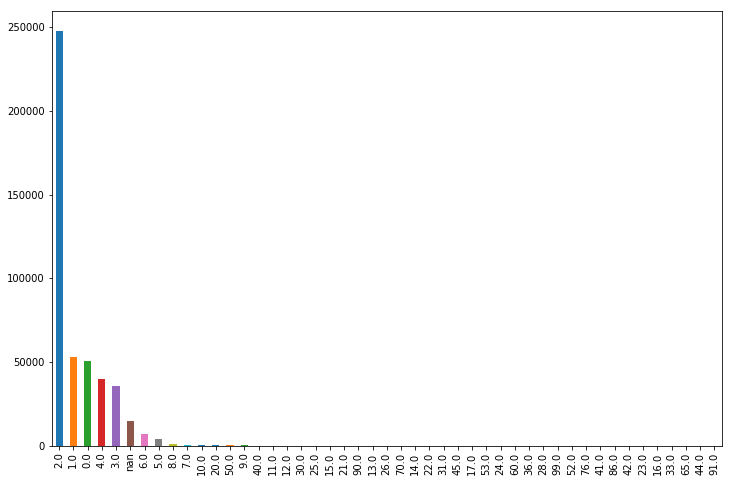

In [65]:
df.nbv.value_counts(dropna=False).plot(kind='bar')

## 2) Un peu de 'data découverte' ;)

### 1.3 Nb de valeurs uniques par colonnes

In [6]:
valforcols = df.nunique()
valforcols

org                   5
lum                   5
agg                   9
int                  10
atm                   9
col                   7
com                 912
dep                 100
catr                  7
infra                 8
voie               1318
v1                   10
v2                   52
circ                  5
nbv                  46
pr                 1257
pr1                1684
vosp                  4
prof                  5
plan                  5
situ                  6
ttue                  8
tbg                  20
tbl                  29
tindm                44
typenumero            4
numero             4475
distancemetre       217
libellevoie       68027
coderivoli          101
grav                235
gps                   4
lat               42203
long              60482
adr                5944
numac            454372
codeinsee         37522
geoflamatch           3
nbimplique           53
dtype: int64

### 1.4 lister les colonnes ayant pour nb de valeurs uniques différentes moins de 50 catégories

In [7]:
justunder50 = valforcols[valforcols<50].index
justunder50

Index(['org', 'lum', 'agg', 'int', 'atm', 'col', 'catr', 'infra', 'v1', 'circ',
       'nbv', 'vosp', 'prof', 'plan', 'situ', 'ttue', 'tbg', 'tbl', 'tindm',
       'typenumero', 'gps', 'geoflamatch'],
      dtype='object')

In [70]:
for col in justunder50:
    print(col)
    print(pd.value_counts(df[col]))

org
5    257834
1    123576
2     47141
3     25685
4       136
Name: org, dtype: int64
lum
1    312282
5     77468
3     34941
2     26108
4      3573
Name: lum, dtype: int64
agg
1    140246
9     78939
6     65520
5     47402
8     46120
7     42590
4     15146
3     11372
2      7037
Name: agg, dtype: int64
int
1    326028
2     56639
3     39214
6     11652
9      7426
4      5739
5      5225
7      1967
8       474
0         8
Name: int, dtype: int64
atm
1.0    369397
2.0     46202
8.0     15061
3.0      9520
7.0      3852
9.0      3597
4.0      2865
5.0      2751
6.0      1104
Name: atm, dtype: int64
col
6.0    147394
3.0    134182
2.0     51340
7.0     49801
1.0     44676
5.0     14173
4.0     12797
Name: col, dtype: int64
catr
4.0    227219
3.0    136519
2.0     33595
1.0     30006
9.0      9521
6.0      2923
5.0       912
Name: catr, dtype: int64
infra
0.0    391755
5.0     27709
3.0      6848
2.0      5925
1.0      3528
6.0      2699
4.0      1629
7.0       254
Name: infra, d

## Appliquer une fonction sur une colonne 

In [88]:
uneFonctionEnUneLigne = lambda x: x**2 + x/10

In [89]:
uneFonctionEnUneLigne(9)

81.9

In [108]:
df.dtypes[df.dtypes=='int']

org           int64
lum           int64
agg           int64
int           int64
com           int64
dep           int64
ttue          int64
tbg           int64
tbl           int64
tindm         int64
numac         int64
nbimplique    int64
dtype: object

In [109]:
df.org.apply(uneFonctionEnUneLigne)[0:5]

0    1.1
1    1.1
2    1.1
3    1.1
4    1.1
Name: org, dtype: float64

## ... ou sur plusieurs colonnes

In [92]:
df[df.dtypes[df.dtypes=='int'].index].apply(uneFonctionEnUneLigne).head()

,org,lum,agg,int,com,dep,ttue,tbg,tbl,tindm,numac,nbimplique
0,1.1,1.1,1.1,1.1,93055.5,946826.3,0.0,1.1,0.0,1.1,1.463568e+11,4.2
1,1.1,1.1,25.5,1.1,96752.1,946826.3,0.0,1.1,0.0,4.2,1.463575e+11,9.3
2,1.1,1.1,25.5,1.1,95511.9,946826.3,0.0,1.1,0.0,1.1,1.463583e+11,4.2
3,1.1,1.1,25.5,1.1,92446.4,946826.3,0.0,1.1,0.0,16.4,1.463591e+11,25.5
4,1.1,1.1,16.4,1.1,97375.2,946826.3,0.0,1.1,0.0,1.1,1.463598e+11,4.2


## sur des lignes avec des colonnes particulières

In [110]:
def f(row):
    return row['org'] + row['lum']
df.head().apply(f, axis=1) # axis =1 => sur les lignes

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [111]:
df.columns

Index(['org', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'dep', 'catr', 'infra',
       'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan',
       'situ', 'ttue', 'tbg', 'tbl', 'tindm', 'typenumero', 'numero',
       'distancemetre', 'libellevoie', 'coderivoli', 'grav', 'gps', 'lat',
       'long', 'adr', 'numac', 'codeinsee', 'geoflamatch', 'nbimplique'],
      dtype='object')

In [8]:
df[justunder50].plot()

## Affichage graphique ? 

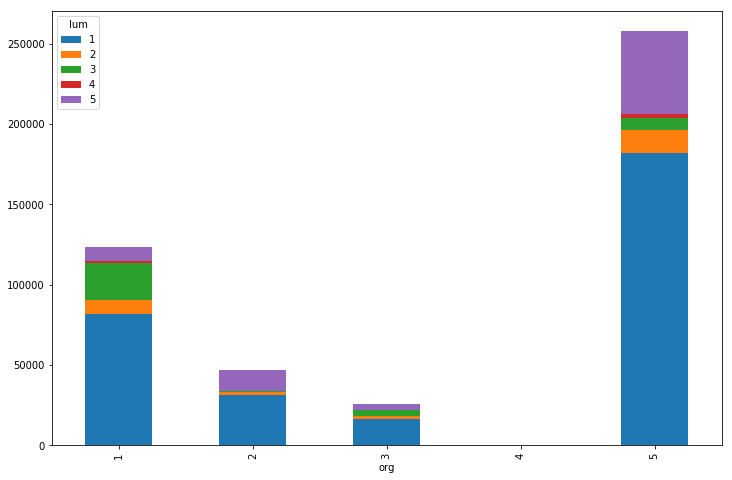

In [147]:
df[justunder50].groupby(['org', 'lum']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
df.groupby('org').nbv.plot(kind='bar')

KeyboardInterrupt: 

## Listons les N/As

org                int64
lum                int64
agg                int64
int                int64
atm              float64
col              float64
com                int64
dep                int64
catr             float64
infra            float64
voie             float64
v1               float64
v2                object
circ             float64
nbv              float64
pr                object
pr1              float64
vosp             float64
prof             float64
plan             float64
situ             float64
ttue               int64
tbg                int64
tbl                int64
tindm              int64
typenumero       float64
numero           float64
distancemetre    float64
libellevoie       object
coderivoli        object
grav             float64
gps               object
lat              float64
long              object
adr               object
numac              int64
codeinsee         object
geoflamatch       object
nbimplique         int64
dtype: object

In [62]:
df.head(3)

,org,lum,agg,int,atm,col,com,dep,catr,infra,...,coderivoli,grav,gps,lat,long,adr,numac,codeinsee,geoflamatch,nbimplique
0,1,1,1,1,1.0,3.0,305,973,NaN,NaN,...,NaN,10.8,G,0.0,0,NaN,382566,97305,N,2
1,1,1,5,1,1.0,3.0,311,973,NaN,NaN,...,NaN,10.8,G,0.0,0,13 Rue H. RIVIEREZ,382567,97311,N,3
2,1,1,5,1,1.0,3.0,309,973,NaN,NaN,...,NaN,10.8,G,0.0,0,"PK7, route de Montjoly",382568,97309,N,2
